**Name:** _Qihang Deng_, _Shuhao Wu_ 

**EID:** _55958264_,  _56051615_

**Kaggle Competition:** _Plant Pathology 2020 - FGVC7_

**Team Name:** _Project Group 38_


# CS5489 - Course Project

Due date: May 4, 11:59pm

## Goal

For the course project, select one of the following competitions on Kaggle:

### [Plant Pathology 2020 - FGVC7](https://www.kaggle.com/c/plant-pathology-2020-fgvc7/overview): Identify the category of foliar diseases in apple trees

> Misdiagnosis of the many diseases impacting agricultural crops can lead to misuse of chemicals leading to the emergence of resistant pathogen strains, increased input costs, and more outbreaks with significant economic loss and environmental impacts. Current disease diagnosis based on human scouting is time-consuming and expensive, and although computer-vision based models have the promise to increase efficiency, the great variance in symptoms due to age of infected tissues, genetic variations, and light conditions within trees decreases the accuracy of detection.
>
> Objectives of ‘Plant Pathology Challenge’ are to train a model using images of training dataset to 1) Accurately classify a given image from testing dataset into different diseased category or a healthy leaf; 2) Accurately distinguish between many diseases, sometimes more than one on a single leaf; 3) Deal with rare classes and novel symptoms; 4) Address depth perception—angle, light, shade, physiological age of the leaf; and 5) Incorporate expert knowledge in identification, annotation, quantification, and guiding computer vision to search for relevant features during learning.

### [University of Liverpool - Ion Switching](https://www.kaggle.com/c/liverpool-ion-switching/overview): Identify the number of channels open at each time point

>Think you can use your data science skills to make big predictions at a submicroscopic level?
>
>Many diseases, including cancer, are believed to have a contributing factor in common. Ion channels are pore-forming proteins present in animals and plants. They encode learning and memory, help fight infections, enable pain signals, and stimulate muscle contraction. If scientists could better study ion channels, which may be possible with the aid of machine learning, it could have a far-reaching impact.
>
>When ion channels open, they pass electric currents. Existing methods of detecting these state changes are slow and laborious. Humans must supervise the analysis, which imparts considerable bias, in addition to being tedious. These difficulties limit the volume of ion channel current analysis that can be used in research. Scientists hope that technology could enable rapid automatic detection of ion channel current events in raw data.
>
>The University of Liverpool’s Institute of Ageing and Chronic Disease is working to advance ion channel research. Their team of scientists have asked for your help. In this competition, you’ll use ion channel data to better model automatic identification methods. If successful, you’ll be able to detect individual ion channel events in noisy raw signals. The data is simulated and injected with real world noise to emulate what scientists observe in laboratory experiments.
>
>Technology to analyze electrical data in cells has not changed significantly over the past 20 years. If we better understand ion channel activity, the research could impact many areas related to cell health and migration. From human diseases to how climate change affects plants, faster detection of ion channels could greatly accelerate solutions to major world problems.

### [Jigsaw Multilingual Toxic Comment Classification](https://www.kaggle.com/c/jigsaw-multilingual-toxic-comment-classification): Use TPUs to identify toxicity comments across multiple languages

>It only takes one toxic comment to sour an online discussion. The Conversation AI team, a research initiative founded by Jigsaw and Google, builds technology to protect voices in conversation. A main area of focus is machine learning models that can identify toxicity in online conversations, where toxicity is defined as anything rude, disrespectful or otherwise likely to make someone leave a discussion. If these toxic contributions can be identified, we could have a safer, more collaborative internet.
>
>In the previous 2018 Toxic Comment Classification Challenge, Kagglers built multi-headed models to recognize toxicity and several subtypes of toxicity. In 2019, in the Unintended Bias in Toxicity Classification Challenge, you worked to build toxicity models that operate fairly across a diverse range of conversations. This year, we're taking advantage of Kaggle's new TPU support and challenging you to build multilingual models with English-only training data.
>
>Jigsaw's API, Perspective, serves toxicity models and others in a growing set of languages (see our documentation for the full list). Over the past year, the field has seen impressive multilingual capabilities from the latest model innovations, including few- and zero-shot learning. We're excited to learn whether these results "translate" (pun intended!) to toxicity classification. Your training data will be the English data provided for our previous two competitions and your test data will be Wikipedia talk page comments in several different languages.
>
>As our computing resources and modeling capabilities grow, so does our potential to support healthy conversations across the globe. Develop strategies to build effective multilingual models and you'll help Conversation AI and the entire industry realize that potential.


## Groups
Group projects should contain 2 students.  To sign up for a group, go to Canvas and under "People", join one of the existing "Project Groups".  _For group projects, the project report must state the percentage contribution from each project member._

## Methodology
You are free to choose the methodology to solve the task.  In machine learning, it is important to use domain knowledge to help solve the problem.  Hence, instead of blindly applying the algorithms to the data you need to think about how to represent the data in a way that makes sense for the algorithm to solve the task. 


## Evaluation on Kaggle

The final evaluation will be performed on Kaggle.

## Project Presentation

Each project group needs to give a presentation at the end of the semester.  The presentation time is 8 minutes.  You _must_ give a presentation.

## What to hand in

You need to turn in the following things:

1. This ipynb file `CourseProject-2020.ipynb` with your source code and documentation. You should write about all the various attempts that you make to find a good solution.
2. Your final submission file to Kaggle.
3. The ipynb file `CourseProject-2018-final.ipynb`, which contains the code that generates the final submission file that you submit to Kaggle. This code will be used to verify that your Kaggle submission is reproducible.
4. Presentation slides.

Files should be uploaded to "Course Project" on Canvas.


## Grading
The marks of the assignment are distributed as follows:
- 40% - Results using various feature representations, dimensionality reduction methods, classifiers, etc.
- 25% - Trying out feature representations (e.g. adding additional features, combining features from different sources) or methods not used in the tutorials.
- 15% - Quality of the written report.  More points for insightful observations and analysis.
- 15% - Project presentation
- 5% - Final ranking on the Kaggle test data (private leaderboard).

**Late Penalty:** 25 marks will be subtracted for each day late.
<hr>

# YOUR METHODS HERE

# Plant Pathology 2020 - FGVC7: Identify the category of foliar diseases in apple trees

First we need to initialize Python. Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("png")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
from scipy import io
from scipy import ndimage
from scipy.special import softmax
import csv
import os
import zipfile
import fnmatch
import skimage.io
import skimage.color
import skimage.transform
random.seed(100)

Next we will load keras and tensorflow.

In [2]:
# use TensorFlow backend
%env KERAS_BACKEND=tensorflow  
import keras
import tensorflow
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, \
                Input, GlobalAveragePooling2D,GlobalMaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard

import logging
logging.basicConfig()
import struct

random.seed(4487); tensorflow.set_random_seed(4487)
K.set_image_data_format('channels_last')

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [3]:
# some helpers
def plot_history(history): 
    fig, ax1 = plt.subplots()
    
    ax1.plot(history.history['loss'], 'r', label="training loss ({:.6f})".format(history.history['loss'][-1]))
    ax1.plot(history.history['val_loss'], 'r--', label="validation loss ({:.6f})".format(history.history['val_loss'][-1]))
    ax1.grid(True)
    ax1.set_xlabel('epoch')
    ax1.legend(loc="best", fontsize=9)    
    ax1.set_ylabel('loss', color='r')
    ax1.tick_params('y', colors='r')

    if 'acc' in history.history:
        ax2 = ax1.twinx()

        ax2.plot(history.history['acc'], 'b', label="training acc ({:.4f})".format(history.history['acc'][-1]))
        ax2.plot(history.history['val_acc'], 'b--', label="validation acc ({:.4f})".format(history.history['val_acc'][-1]))

        ax2.legend(loc="best", fontsize=9)
        ax2.set_ylabel('acc', color='b')        
        ax2.tick_params('y', colors='b')

def plot_by_class():
    plt.figure(figsize=(16,12))
    for i in range(len(class_names)):
        inds = where(trainclasses[:,i]==1)[0][:4]
        for j in range(len(inds)):
            plt.subplot(4,4,4*i+j+1)
            plt.imshow(imgdata['train'][inds[j]])    
            plt.title(class_names[i])
            plt.axis('off')
    plt.show()

# plot an ROC curve using class labels and class scores
def plot_roc(tagnames, Yclasses, Yscores):
    fprall = []
    tprall = []
    aucall = []
    for i in range(len(tagnames)):
        fpr, tpr, thresholds = metrics.roc_curve(Yclasses[:,i], Yscores[:,i])
        plt.plot(fpr, tpr, lw=0.5, alpha=0.5)
        auc = metrics.auc(fpr, tpr)
        fprall.append(fpr)
        tprall.append(tpr)
        aucall.append(auc)

    # Then interpolate all ROC curves at this points
    all_fpr = unique(concatenate(fprall))
    mean_tpr = zeros_like(all_fpr)
    for i in range(len(tagnames)):
        mean_tpr += interp(all_fpr, fprall[i], tprall[i])

    # Finally average it and compute AUC
    mean_tpr /= len(tagnames)

    # auc of the average ROC curve
    auc = metrics.auc(all_fpr, mean_tpr)

    # average AUC
    avg_auc = mean(aucall)

    plt.plot(all_fpr, mean_tpr, 'k-', lw=2)
    plt.title('AVGAUC={:.4f}, AUC={:.4f}'.format(avg_auc, auc))

    plt.grid(True)


def write_csv_kaggle_classes(fname, class_names, Yclasses):
    # header
    tmp = [['image_id']]
    for t in class_names:
        tmp[0].append(t)    
    
    # add ID numbers for each Y, and usage if necessary
    for i in range(len(Yclasses)):
        tmp2 = ['Test_'+str(i)]
        for t in range(len(class_names)):
            tmp2.append(Yclasses[i,t])
        
        tmp.append(tmp2)
        
    # write CSV file
    f = open(fname, 'w')
    writer = csv.writer(f)
    writer.writerows(tmp)
    f.close()

## 1. Loading Data and Pre-processing
Next we need to load the images. Run the following cell to load the images.

In [4]:
# Load dataset
traindata = loadtxt('train.csv', delimiter=',', dtype=str)
testdata = loadtxt('test.csv', delimiter=',', dtype=str)

imgdata = {'train':[], 'test':[]}
classes = {'train':[], 'test':[]}

#First row is the class names
class_names = traindata[0, 1:]
#The imgage_id from the second row to the last row.
train_image_id = traindata[1:, 0]
test_image_id = testdata[1:]

#Load the images and classess of training set.
for i, image_id in enumerate(train_image_id):
    img = image.load_img("images/"+ image_id +".jpg", target_size=(224, 224))
    # append data
    imgdata["train"].append(img)
    classes["train"].append(list(map(int, traindata[i+1, 1:])))

#Load the images of test set.
for i, image_id in enumerate(test_image_id):
    img = image.load_img("images/"+ image_id +".jpg", target_size=(224,224))
    imgdata["test"].append(img)

trainclasses = array(classes['train'])

print(class_names)
print("Number of training samples:", len(imgdata['train']))
print("Number of testing samples:", len(imgdata['test']))
print(img.size)

['healthy' 'multiple_diseases' 'rust' 'scab']
('Number of training samples:', 1821)
('Number of testing samples:', 1821)
(224, 224)


Each image is a 224x224. There are 4 classes of differerent images. Run the below code to show examples of each class.

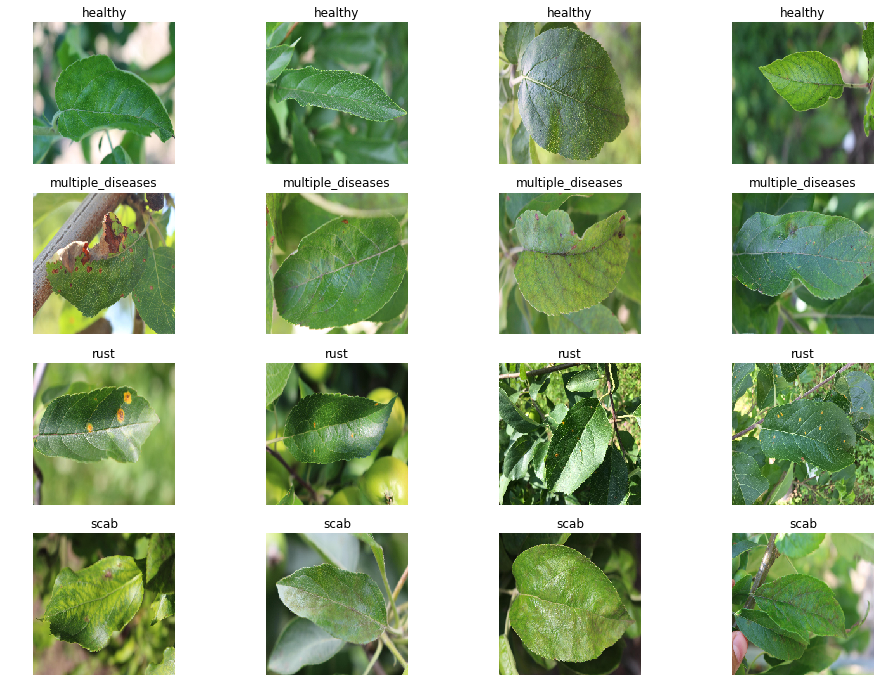

In [5]:
plot_by_class()

## 2. Extract Deep features

Now preprocess the images in imdata and put them into a 4D tensor for ResNet.  The tensor is `Xim`.

In [5]:
# contains the model and support functions for ResNet50
import keras.applications.resnet50 as resnet

trainXim = zeros((len(imgdata['train']), 224, 224, 3))
for i,img in enumerate(imgdata['train']):
    x = image.img_to_array(img)
    x = expand_dims(x, axis=0)
    x = resnet.preprocess_input(x)
    trainXim[i,:] = x
    
testXim = zeros((len(imgdata['test']), 224, 224, 3))
for i,img in enumerate(imgdata['test']):
    x = image.img_to_array(img)
    x = expand_dims(x, axis=0)
    x = resnet.preprocess_input(x)
    testXim[i,:] = x

Extract features from Resnet50, call it Xf. Set the pooling equal to max

In [7]:
# create an instance of the model w/o the last layer, set the pooling equal to max
model_f = resnet.ResNet50(weights='imagenet', include_top=False, pooling='max')

# compute the features
trainXf = model_f.predict(trainXim)
print(trainXf.shape)

testXf = model_f.predict(testXim)
print(testXf.shape)

(1821, 2048)
(1821, 2048)


## 3. Train a classifier with Logistic Regression

Data Splitting - Validation Set

In [8]:
# randomly split data into train and validation set
( trainXft, trainXfv,       # features 
  trainYt, trainYv,         # class labels
  trainimgdata, vdimgdata,     # raw images
) = model_selection.train_test_split(trainXf, trainclasses, imgdata['train'],
  train_size=0.8, test_size=0.2, random_state=4487)

print(trainXft.shape)
print(trainXfv.shape)

(1456, 2048)
(365, 2048)


Now learn a logisic regression classifier for each class.

In [9]:
classmodels = {}
for i,t in enumerate(class_names):
    print('training {} - {}'.format(i, t))
    myY = trainclasses[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, class_weight='balanced', solver='liblinear')
    lr.fit(trainXf, myY)
    classmodels[t] = lr

training 0 - healthy
training 1 - multiple_diseases
training 2 - rust
training 3 - scab


To see how we did on classification the training set, validation set and test set, we compute the class scores.

In [10]:
train_predscore_t = zeros(shape=(len(trainXft), len(class_names)))

for i,t in enumerate(class_names):
    print('predicting {} - {}'.format(i, t))

    tmp = classmodels[t].decision_function(trainXft)
    train_predscore_t[:,i] = tmp

predicting 0 - healthy
predicting 1 - multiple_diseases
predicting 2 - rust
predicting 3 - scab


In [11]:
train_predscore_v = zeros(shape=(len(trainXfv), len(class_names)))

for i,t in enumerate(class_names):
    print('predicting {} - {}'.format(i, t))

    tmp = classmodels[t].decision_function(trainXfv)
    train_predscore_v[:,i] = tmp

predicting 0 - healthy
predicting 1 - multiple_diseases
predicting 2 - rust
predicting 3 - scab


In [12]:
test_predscore = zeros(shape=(len(testXf), len(class_names)))

for i,t in enumerate(class_names):
    print('predicting {} - {}'.format(i, t))

    tmp = classmodels[t].decision_function(testXf)
    test_predscore[:,i] = tmp

predicting 0 - healthy
predicting 1 - multiple_diseases
predicting 2 - rust
predicting 3 - scab


And then plot the ROC curve using the training classes and training predicted scores. 

------------------Training set AUC------------------


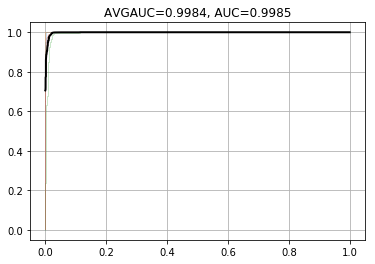

In [13]:
print("------------------Training set AUC------------------")
plot_roc(class_names, trainYt, train_predscore_t)

------------------Validation set AUC------------------


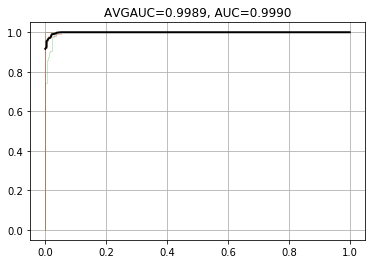

In [14]:
print("------------------Validation set AUC------------------")
plot_roc(class_names, trainYv, train_predscore_v)

We need to convert the score into a binary class label using a threshold (usually 0). And compute the accracy of validation set.

In [15]:
train_predclass_v = train_predscore_v>0

acc = metrics.accuracy_score(trainYv, train_predclass_v)
print("Logistic regression validation accuracy=", acc)

('Logistic regression validation accuracy=', 0.9534246575342465)


But for the result of the test set for submission to Kaggle. We need to submit the probabilities, therefore we leverage softmax to convert the score into probability value.

In [28]:
test_predclass = softmax(test_predscore, axis=1)

Now write the class scores for the test set for submission to Kaggle.

In [17]:
write_csv_kaggle_classes("Submission_Kaggle_ResNet50_lr_softmax.csv", class_names, test_predclass)

Result of Kaggle
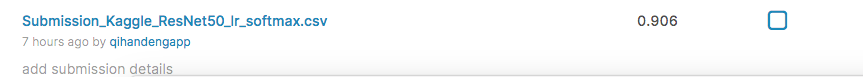

## 4. Train a classifier with SVM

In [42]:
# setup the list of parameters to try
paramgrid = {'C': logspace(-4,4,20)}
classmodels = {}

for i,t in enumerate(class_names):
    print('training {} - {}'.format(i, t))
    myY = trainclasses[:,i].ravel()
    # setup cross-validation
    svmcv = model_selection.GridSearchCV(svm.SVC(kernel='linear'), paramgrid, cv=5,n_jobs=4, verbose=True)
    # run cross-validation (train for each split)
    svmcv.fit(trainXf, myY);
    classmodels[t] = svmcv

training 0 - healthy
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   43.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.6min finished


training 1 - multiple_diseases
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   37.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.4min finished


training 2 - rust
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   40.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.5min finished


training 3 - scab
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   45.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.7min finished


In [43]:
train_predscore_v = zeros(shape=(len(trainXfv), len(class_names)))

for i,t in enumerate(class_names):
    print('predicting {} - {}'.format(i, t))

    tmp = classmodels[t].decision_function(trainXfv)
    train_predscore_v[:,i] = tmp

predicting 0 - healthy
predicting 1 - multiple_diseases
predicting 2 - rust
predicting 3 - scab


In [44]:
test_predscore = zeros(shape=(len(testXf), len(class_names)))

for i,t in enumerate(class_names):
    print('predicting {} - {}'.format(i, t))

    tmp = classmodels[t].decision_function(testXf)
    test_predscore[:,i] = tmp

predicting 0 - healthy
predicting 1 - multiple_diseases
predicting 2 - rust
predicting 3 - scab


Plot the ROC curve using the training classes and training predicted scores for validation set, and compute the accuracy.

------------------Validation set AUC------------------


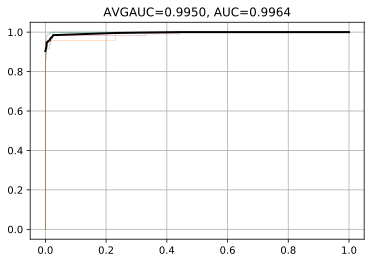

In [45]:
print("------------------Validation set AUC------------------")
plot_roc(class_names, trainYv, train_predscore_v)

In [47]:
train_predclass_v = train_predscore_v>0
acc = metrics.accuracy_score(trainYv, train_predclass_v)
print("SVM validation accuracy=", acc)

('SVM validation accuracy=', 0.9095890410958904)


Now write the class scores for the test set for submission to Kaggle.

In [48]:
test_predclass = softmax(test_predscore, axis=1)
write_csv_kaggle_classes("Submission_Kaggle_ResNet50_svm_softmax.csv", class_names, test_predclass)

Result of Kaggle
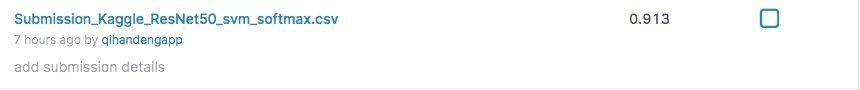

# 5. Transfer Learning


The pre-trained network can also be "fine-tuned" for a new image classification task, which is called transfer learning. Let's start from the pre-trained network ResNet50: 
First, fix the lower layers that extract features (no need to train them since they are good features).
Second, train the last few layers to perform the new task.


Data Splitting - Validation Set

In [9]:
# generate a fixed validation set using 10% of the training set
vtrainXim, validXim, vtrainYb, validYb = \
  model_selection.train_test_split(trainXim, trainclasses, 
  train_size=0.9, test_size=0.1, random_state=6487)

# validation data
validset  = (validXim, validYb)

We will use the Model class: connect layers one-by-one, then pass the previous layer to it.

In [8]:
K.clear_session()
random.seed(4487); tensorflow.set_random_seed(4487)

# create the base pre-trained model with-out the classifier
base_model = resnet.ResNet50(weights='imagenet', include_top=False)

# start with the output of the ResNet50 (7x7x2048)
x = base_model.output

# for each channel, average all the features (1x2048)
x = GlobalAveragePooling2D()(x)

# fully-connected layer (1 x500)
x = Dense(500, activation='relu')(x)

# finally, the softmax for the classifier (4 classes)
predictions = Dense(4, activation='softmax')(x)

/public/wsh/miniconda3/envs/3DmFV/lib/python2.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Create the Model, and specify the input and output layers, including the weights of the layers of ResNet so they will not change during training.

In [9]:
# build the model for training
# - need to specify the input layer and the output layer
model_ft = Model(inputs=base_model.input, outputs=predictions)

# fix the layers of the ResNet50.
for layer in base_model.layers:
    layer.trainable = False

# compile the model - only the layers that we added will be trained
model_ft.compile(optimizer='rmsprop',  
              loss='categorical_crossentropy', metrics=['accuracy'])

Setup the data augmentation generator

In [11]:
from keras.preprocessing.image import ImageDataGenerator

def add_gauss_noise(X, sigma2=0.05):
    # add Gaussian noise with zero mean, and variance sigma2
    return X + random.normal(0, sigma2, X.shape)

# build the data augmenter
datagen = ImageDataGenerator(
    rotation_range=10,         # image rotation
    width_shift_range=0.1,     # image shifting
    height_shift_range=0.1,    # image shifting
    shear_range=0.1,           # shear transformation
    zoom_range=0.1,            # zooming
    horizontal_flip=True, 
    preprocessing_function=add_gauss_noise, 
)

# fit (required for some normalization augmentations)
datagen.fit(vtrainXim)

Train the model: only the last layers that we added are updated

In [12]:
# train the model on the new data for a few epochs
bsize = 32
callbacks_list = []
history = model_ft.fit_generator(
            datagen.flow(vtrainXim, vtrainYb, batch_size=bsize),  # data from generator
            steps_per_epoch=len(vtrainXim)/bsize,    # should be number of batches per epoch
            epochs=40,
            callbacks=callbacks_list, 
            validation_data=validset, verbose=True)

Epoch 1/40
51/51 [==============================] - 30s 594ms/step - loss: 11.3786 - acc: 0.2806 - val_loss: 11.9785 - val_acc: 0.2568
Epoch 2/40
51/51 [==============================] - 26s 519ms/step - loss: 11.6131 - acc: 0.2795 - val_loss: 11.9785 - val_acc: 0.2568
Epoch 3/40
51/51 [==============================] - 28s 540ms/step - loss: 11.4798 - acc: 0.2878 - val_loss: 11.9785 - val_acc: 0.2568
Epoch 4/40
51/51 [==============================] - 26s 518ms/step - loss: 11.5020 - acc: 0.2864 - val_loss: 11.9785 - val_acc: 0.2568
Epoch 5/40
51/51 [==============================] - 26s 517ms/step - loss: 11.4995 - acc: 0.2865 - val_loss: 11.9785 - val_acc: 0.2568
Epoch 6/40
51/51 [==============================] - 27s 520ms/step - loss: 11.4279 - acc: 0.2910 - val_loss: 11.9785 - val_acc: 0.2568
Epoch 7/40
51/51 [==============================] - 27s 524ms/step - loss: 11.5292 - acc: 0.2847 - val_loss: 11.9785 - val_acc: 0.2568
Epoch 8/40
51/51 [==============================] - 27s

Training/validation curves

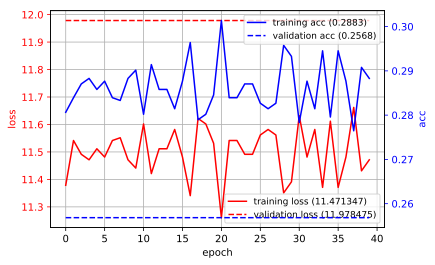

In [14]:
plot_history(history)

Compute the class scores for the test set and write to the submission file to Kaggle.

In [17]:
predYscore = model_ft.predict(testXim)
write_csv_kaggle_classes("Submission_Kaggle_ResNet50_transfer_learning.csv", class_names, predYscore)

Result of Kaggle
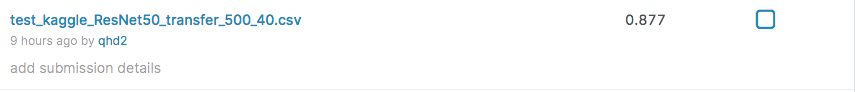

# 6. Training ResNet50/DenseNet121 with random weights initialization

Since ImageNet has broad range of classes, the pretrained ResNet50 model may not have the enough knowledge about the slight differences that differentiate leaves. To improve result, we decide to retrain the ResNet50 model.

In [ ]:
# ResNet50
nn_res = resnet.ResNet50(weights=None, include_top=False, pooling='avg')
pred4c =Dense(4, activation="sigmoid")(nn_res.output)
cus_res = Model(input=nn_res.input, output=pred4c)

# DenseNet121
nn_dense = densenet.DenseNet121(weights=None, include_top=False, pooling='avg')
pred4c_d =Dense(4, activation="sigmoid")(nn_dense.output)
cus_dense = Model(input=nn_dense.input, output=pred4c_d)
# Rest procedures are the same.

Running `cus_res.summary()`, we can see:

- Total params: 23,595,908
- Trainable params: 23,542,788
- Non-trainable params: 53,120

In [ ]:
# add 2 callbacks
tensorboard = TensorBoard(
    log_dir='./logs/cus_res0',
    histogram_freq=0,
    write_graph=False,
    write_images=False
)
earlystop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=5,
    verbose=1, mode='auto'
)

def add_gauss_noise(X, sigma2=0.05):
    # add Gaussian noise with zero mean, and variance sigma2
    return X + random.normal(0, sigma2, X.shape)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    preprocessing_function=add_gauss_noise,
    data_format='channels_last'
)

cus_res.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.SGD(lr=0.02, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

history = cus_res.fit_generator(
    datagen.flow(vtrainXim, vtrainYb, batch_size=50), # data from generator
    steps_per_epoch=len(vtrainXim)/50, # should be number of batches per
    epochs=200,
    callbacks=[tensorboard,earlystop],
    validation_data=(validXim,validYb),
    verbose=False
)

cus_res.save('res50retrained_72.h5')
# res50fit = tf.keras.models.load_model('res50retrained_72.h5')
predYscore_res = cus_res.predict(testXim)

Result of ResNet50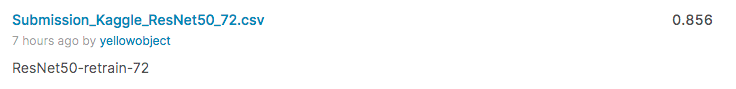



Result of DenseNet121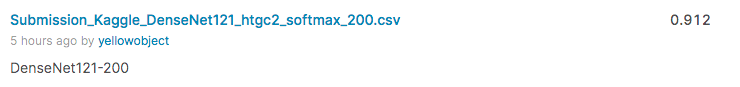

# 7. Summary


The method of using extracted features from pre-trained model are good enough compared with the re-trained one. One possible explanation is that, compared with the size of trainable parameters, the number of samples is way to small for model to learn something intrinsic. And also the data augmentation method being used is not able to provide hard-enough problem for models to differentiate.

Using the pre-trained model from ResNet50 to extract deep features, and combining with SVM classification algorithsm, the classification accuracy of test set can get a pretty good result at 0.913.